In [1]:
import pandas as pd
import os
import numpy as np
import re 
import matplotlib.pyplot as plt
from ast import literal_eval

In [3]:
print(os.getcwd())

file = pd.read_csv('../AA_CCLE_hg38_aggregated_050323/aggregated_results.csv')

df = file.query("Classification == 'ecDNA'").query("`Tissue of origin` == 'lung'")

df

/Users/willardwashingtonford/Documents/UCSD/3_third_year/spring_24/beng_182/project/BENG-182-Project


,Unnamed: 0,Sample name,AA amplicon number,Feature ID,Classification,Location,Oncogenes,Complexity score,Captured interval length,Feature median copy number,...,Tissue of origin,Sample type,Feature BED file,CNV BED file,AA PNG file,AA PDF file,AA summary file,Run metadata JSON,Sample metadata JSON,All genes
16,16,ABC1_LUNG,1.0,ABC1_LUNG_amplicon1_ecDNA_1,ecDNA,['chr4:161967909-162770269'],[],0.683321,802360.0,5.169744,...,lung,cell line,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,['FSTL5']
19,19,ABC1_LUNG,4.0,ABC1_LUNG_amplicon4_ecDNA_1,ecDNA,"['chr20:537320-1408502', 'chr20:1410170-158039...",['CSNK2A1'],0.688915,1232800.0,9.228804,...,lung,cell line,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,"['ANGPT4', 'C20orf202', 'CSNK2A1', 'FAM110A', ..."
70,70,CALU6_LUNG,1.0,CALU6_LUNG_amplicon1_ecDNA_1,ecDNA,"['chr13:90413676-91826022', 'chr13:91826390-93...",[],1.086027,9392399.0,6.169594,...,lung,cell line,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,"['ABCC4', 'CLDN10', 'CLDN10-AS1', 'CLYBL', 'CL..."
83,83,CHAGOK1_LUNG,4.0,CHAGOK1_LUNG_amplicon4_ecDNA_1,ecDNA,['chr3:168992405-170364886'],"['MECOM', 'PRKCI', 'SEC62', 'SKIL']",0.681051,1372481.0,8.886251,...,lung,cell line,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,"['ACTRT3', 'GPR160', 'LRRC31', 'LRRC34', 'LRRI..."
95,95,COLO668_LUNG,1.0,COLO668_LUNG_amplicon1_ecDNA_1,ecDNA,"['chr1:39472080-40049716', 'chr1:40107010-4011...",[],1.624277,977458.0,83.004869,...,lung,cell line,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,"['BMP8A', 'BMP8B', 'CAP1', 'COL9A2', 'HEYL', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,SBC5_LUNG,2.0,SBC5_LUNG_amplicon2_ecDNA_1,ecDNA,['chr2:150095386-150291351'],[],0.673599,195965.0,5.314393,...,lung,cell line,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,[]
1008,1008,SCLC21H_LUNG,1.0,SCLC21H_LUNG_amplicon1_ecDNA_1,ecDNA,"['chr8:11374838-11388057', 'chr8:11389697-1140...",[],0.492403,89128.0,160.186905,...,lung,cell line,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/ccl...,/Users/jluebeck/Desktop/research/CCLE/hg38/CCL...,/Users/jluebeck/Desktop/research/CCLE/hg3

In [4]:
unwanted_columns=['Unnamed: 0', 'Feature BED file', 'CNV BED file', 'AA PNG file', 'AA PDF file', 'AA summary file', 'Run metadata JSON', 'Sample metadata JSON']

filtered_df = df.drop(columns = unwanted_columns)
filtered_df

,Sample name,AA amplicon number,Feature ID,Classification,Location,Oncogenes,Complexity score,Captured interval length,Feature median copy number,Feature maximum copy number,Filter flag,Reference version,Tissue of origin,Sample type,All genes
16,ABC1_LUNG,1.0,ABC1_LUNG_amplicon1_ecDNA_1,ecDNA,['chr4:161967909-162770269'],[],0.683321,802360.0,5.169744,5.169744,LowCN,GRCh38,lung,cell line,['FSTL5']
19,ABC1_LUNG,4.0,ABC1_LUNG_amplicon4_ecDNA_1,ecDNA,"['chr20:537320-1408502', 'chr20:1410170-158039...",['CSNK2A1'],0.688915,1232800.0,9.228804,10.717917,NaN,GRCh38,lung,cell line,"['ANGPT4', 'C20orf202', 'CSNK2A1', 'FAM110A', ..."
70,CALU6_LUNG,1.0,CALU6_LUNG_amplicon1_ecDNA_1,ecDNA,"['chr13:90413676-91826022', 'chr13:91826390-93...",[],1.086027,9392399.0,6.169594,8.694152,NaN,GRCh38,lung,cell line,"['ABCC4', 'CLDN10', 'CLDN10-AS1', 'CLYBL', 'CL..."
83,CHAGOK1_LUNG,4.0,CHAGOK1_LUNG_amplicon4_ecDNA_1,ecDNA,['chr3:168992405-170364886'],"['MECOM', 'PRKCI', 'SEC62', 'SKIL']",0.681051,1372481.0,8.886251,9.525160,NaN,GRCh38,lung,cell line,"['ACTRT3', 'GPR160', 'LRRC31', 'LRRC34', 'LRRI..."
95,COLO668_LUNG,1.0,COLO668_LUNG_amplicon1_ecDNA_1,ecDNA,"['chr1:39472080-40049716', 'chr1:40107010-4011...",[],1.624277,977458.0,83.004869,127.732533,NaN,GRCh38,lung,cell line,"['BMP8A', 'BMP8B', 'CAP1', 'COL9A2', 'HEYL', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,SBC5_LUNG,2.0,SBC5_LUNG_amplicon2_ecDNA_1,ecDNA,['chr2:150095386-150291351'],[],0.673599,195965.0,5.314393,5.314393,LowCN,GRCh38,lung,cell line,[]
1008,SCLC21H_LUNG,1.0,SCLC21H_LUNG_amplicon1_ecDNA_1,ecDNA,"['chr8:11374838-11388057', 'chr8:11389697-1140...",[],0.492403,89128.0,160.186905,183.020365,NaN,GRCh38,lung,cell line,['TTLL10']
1009,SCLC21H_LUNG,1.0,SCLC21H_LUNG_amplicon1_ecDNA_2,ecDNA,"['chr8:62509769-62527520', 'chr8:83003750-8304...",['MYC'],0.427400,179914.0,132.783881,188.153523,NaN,GRCh38,lung,cell line,"['CASC11', 'MYC']"
1046,SKMES1_LUNG,1.0,SKMES1_LUNG_amplicon1_ecDNA_1,ecDNA,['chr3:115137901-115881908'],[],0.676752,744007.0,4.972221,5.462756,LowCN,GRCh38,lung,cell line,['GAP43']


In [5]:
oncogenes = filtered_df.Oncogenes.apply(literal_eval).sum()
len(set(oncogenes))

62

In [6]:
genes = filtered_df['All genes'].apply(literal_eval).sum()
len(set(genes))

1081

In [7]:
crispr = pd.read_csv('~/Downloads/CSE182/Project/CRISPRGeneEffect.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/willardwashingtonford/Downloads/CSE182/Project/CRISPRGeneEffect.csv'

In [8]:
crispr.head()

NameError: name 'crispr' is not defined

In [5]:
rna = pd.read_csv('~/Downloads/CSE182/Project/RNAi_(Achilles+DRIVE+Marcotte,_DEMETER2)_subsetted.csv')

/var/folders/tw/s28d3syd7hb17qw_0b9v2sg40000gn/T/ipykernel_3795/1703307961.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  rna = pd.read_csv('~/Downloads/CSE182/Project/RNAi_(Achilles+DRIVE+Marcotte,_DEMETER2)_subsetted.csv')


In [7]:
rna.head()

,depmap_id,cell_line_display_name,lineage_1,lineage_2,lineage_3,lineage_5,lineage_6,lineage_4,A1BG,NAT2,...,RCE1,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,KCNE2,DGCR2,CASP8AP2,SCO2
0,ACH-001270,127399,Soft Tissue,Synovial Sarcoma,Synovial Sarcoma,NaN,NaN,NaN,NaN,NaN,...,-0.201644,-0.363670,0.184260,-0.115616,-0.125958,NaN,0.088853,NaN,-0.843295,NaN
1,ACH-002319,184A1,Breast,Non-Cancerous,Immortalized Breast Cells,NaN,NaN,NaN,-0.190388,0.384106,...,0.209009,-0.156839,-0.155837,-0.001141,NaN,0.227968,0.028095,-0.080611,-1.849696,-0.078856
2,ACH-001827,184B5,Breast,Non-Cancerous,Immortalized Breast Cells,NaN,NaN,NaN,0.907063,0.403192,...,-0.137465,-1.037848,-0.261262,-0.228016,NaN,0.088744,0.159467,0.014071,-0.414154,0.032661
3,ACH-002320,600MPE,Breast,Invasive Breast Carcinoma,"Breast Invasive Carcinoma, NOS",NaN,NaN,NaN,0.091580,-0.317969,...,-0.108353,-0.073992,-0.141390,0.067448,NaN,-0.049485,-0.008985,0.055804,-0.037574,0.234413
4,ACH-000283,A1207,CNS/Brain,Diffuse Glioma,Glioblastoma,Glioblastoma,NaN,NaN,-0.037302,-0.314357,...,-0.212745,-0.423863,-0.192900,0.056161,0.082429,0.085947,-0.135873,0.320837,-0.585730,-0.545158


In [82]:
rna_means = pd.DataFrame(rna.loc[:, rna.columns[8:16818]].mean(axis=0)) 

In [112]:
rna_means.to_csv('rna_mean.csv')

In [13]:
rna_means = pd.read_csv('rna_mean.csv')
crispr_means = pd.read_csv('crispr_means.csv')

In [9]:
crispr_means = pd.DataFrame(crispr.loc[:, crispr.columns[1:18444]].mean(axis=0)) 

NameError: name 'crispr' is not defined

In [12]:
renamed = pd.DataFrame()
for c in crispr_means.index:
    new = pd.DataFrame({re.sub("[\s(\[].*?[\)\]]", "", c): [crispr_means.loc[c, 0]]})
    renamed = pd.concat([renamed, new], axis = 1)
    display(renamed)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cq/mb8lwm3s0djg7rfgcs4gkx700000gn/T/ipykernel_69370/888293329.py:3: SyntaxWarning: invalid escape sequence '\s'
  new = pd.DataFrame({re.sub("[\s(\[].*?[\)\]]", "", c): [crispr_means.loc[c, 0]]})
/var/folders/cq/mb8lwm3s0djg7rfgcs4gkx700000gn/T/ipykernel_69370/888293329.py:3: SyntaxWarning: invalid escape sequence '\s'
  new = pd.DataFrame({re.sub("[\s(\[].*?[\)\]]", "", c): [crispr_means.loc[c, 0]]})


TypeError: expected string or bytes-like object, got 'int'

In [49]:
crispr_means.loc['A1BG (1)', 0]

-0.038015139707335735

In [104]:
renamed = renamed.T
renamed

,0
A1BG,-0.038015
A1CF,-0.086516
A2M,0.048046
A2ML1,0.074088
A3GALT2,-0.122814
...,...
ZYG11A,-0.062655
ZYG11B,-0.228149
ZYX,-0.024341
ZZEF1,-0.172886


In [105]:
renamed.to_csv('crispr_means.csv')

In [100]:
crispir.index

Index(['A1BG ', 'A1CF ', 'A2M ', 'A2ML1 ', 'A3GALT2 ', 'A4GALT ', 'A4GNT ',
       'AAAS ', 'AACS ', 'AADAC ',
       ...
       'ZWILCH ', 'ZWINT ', 'ZXDA ', 'ZXDB ', 'ZXDC ', 'ZYG11A ', 'ZYG11B ',
       'ZYX ', 'ZZEF1 ', 'ZZZ3 '],
      dtype='object', length=18443)

In [14]:
rna_means = pd.read_csv('rna_mean.csv', index_col=0)
rna_means

,0
A1BG,-0.037563
NAT2,-0.064273
ADA,0.004964
CDH2,0.015570
AKT3,0.037530
...,...
SLC12A6,0.102559
KCNE2,-0.019330
DGCR2,0.050729
CASP8AP2,-0.542230


In [15]:
crispir = pd.read_csv('crispr_means.csv', index_col=0)
crispir['0']

A1BG      -0.038015
A1CF      -0.086516
A2M        0.048046
A2ML1      0.074088
A3GALT2   -0.122814
             ...   
ZYG11A    -0.062655
ZYG11B    -0.228149
ZYX       -0.024341
ZZEF1     -0.172886
ZZZ3      -0.337172
Name: 0, Length: 18443, dtype: float64

In [16]:
common_genes = rna_means.index.intersection(crispir.index)
rna_intersection = rna_means.loc[common_genes]
crispir_intersection = crispir.loc[common_genes]

In [17]:
crispir_intersection.loc['CHEK1']

0   -1.768592
Name: CHEK1, dtype: float64

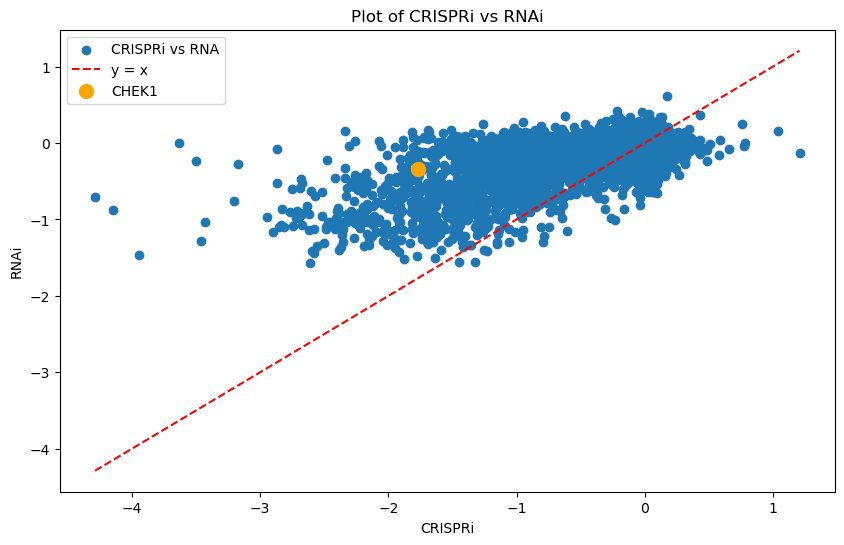

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(crispir_intersection, rna_intersection, label='CRISPRi vs RNA')

# Add the y=x line
min_val = min(min(crispir_intersection['0']), min(rna_intersection['0']))
max_val = max(max(crispir_intersection['0']), max(rna_intersection['0']))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

plt.scatter(crispir_intersection.loc['CHEK1'], rna_intersection.loc['CHEK1'], color='orange', s=100, label='CHEK1')

# Add labels, title, and legend
plt.xlabel('CRISPRi')
plt.ylabel('RNAi')
plt.title('Plot of CRISPRi vs RNAi')
plt.legend()

# Show the plot
plt.show()

In [ ]:
weight_mean = np.mean(sample["weight"])
height_mean = np.mean(sample["height"])

lm_beta = np.cov(sample.height, sample.weight)[0, 1] / (np.std(sample.height, ddof = 1)**2)
lm_beta 

In [ ]:
lm_alpha = weight_mean - lm_beta * height_mean
lm_alpha

In [ ]:
y_hat = lm_alpha + sample["height"] * lm_beta 
SSE = np.sum((sample["weight"] - y_hat) ** 2)

SSE

In [ ]:
se = np.sqrt(SSE / (n - 2))
se

In [ ]:
t_value = lm_beta / (se / np.sqrt(np.sum((sample["height"] - height_mean)**2)))
t_value

In [ ]:
from scipy.stats import t

df = n - 2

p_value_lower = t.cdf(-np.abs(t_value), df)
p_value_upper = 1 - t.cdf(t_value, df)
p_value = p_value_lower + p_value_upper
p_value